 # Run OLS and RF models
  1. Is a good a idea consider the variables with more correlation. 
  2. I add all the variables beacuse I don't have enough knowledge of the variables. 
  3. The code is ajusted to run the model with the variable that you want (applies for RF).

## First, run a lineal model of the variables


In [1]:
import pandas as pd
import statsmodels.api as sm
from openpyxl import Workbook
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

# Leer los DataFrames
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',').dropna()
data_frame_combinado_dep = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',').dropna()

# Verificar las columnas de cada DataFrame
print("Variables Independientes:\n", data_frame_combinado_indep.columns)
print("Variables Dependientes:\n", data_frame_combinado_dep.columns)

Variables Independientes:
 Index(['id', 'OutDeg_RedConfltAgu', 'Degree_RedConfliAgu',
       'Degree_RedeIrmonsPr', 'OutDeg_PaiTiopaterC', 'OutDeg_TiosMaternos',
       'Degree_IntimAmigUnd', 'OutDeg_IntimAmigos_', 'OutDeg_RedeRisk_Cen',
       'OutDeg_RedeConfianc', 'Degree_RedeConflitA', 'Degree_RedeConflitG',
       'OutDeg_VendaParcela', 'OutDeg_EmprestParce', 'PC1_Distance_Pro',
       'PC2_Distance_Pro', 'Avg_Distancia_Dist_moranza', 'Degree_RedeTotFamil',
       '1_VarExp_Moranca', '2_VarExp_Atri_Tabanca', '3_VarExp_Atri_Fanado',
       '4_VarExp_Atri_CargosWM', '5_VarExp_Atri_Idade',
       '6_VarExp_Atri_ClassIdade', '7_VarExp_Atri_IndForcaFugon',
       '8_VarExp_Atri_IndInvestDiq', '9_VarExp_Atri_IndMelhorTecnDiqCint',
       '10_VarExp_Atri_MelhorTecnTubos'],
      dtype='object')
Variables Dependientes:
 Index(['id', 'Degree_Rede_EntreajudaLabur',
       'Indeg_Var.Dep_RedeControlExtAusencia',
       'Indeg_Var.Dep_ApoioSpecDiqCint', 'Indeg_Var.Dep_ApoioSpecTubos',
       

In [2]:

from sklearn.preprocessing import LabelEncoder
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Aplicar LabelEncoder a cada columna en la lista
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])



In [7]:
data_frame_combinado_dep

,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Antonio Mbunh,12,1,2,2,0,2,2,0,4,4,0
1,Bulna Ntumba,12,3,1,1,0,3,3,6,7,7,0
2,Nghala Pungana,12,1,1,1,2,3,1,2,4,4,0
3,Samba Ndum,12,1,1,2,4,9,9,18,18,18,0
4,Tomas Isnaba,12,2,2,3,3,4,4,5,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Bedamatcha Ayatche,19,3,0,0,0,4,4,0,8,8,0
125,Nfensande Sumba,19,0,1,0,0,2,1,0,3,3,0
126,Nsumba Ance,19,1,1,1,0,0,0,0,0,0,0
127,Rufna Cabi,19,2,1,1,0,2,1,0,3,3,0


In [8]:
data_frame_combinado_indep

,id,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,...,1_VarExp_Moranca,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos
0,Antonio Mbunh,1,1,0,0,0,5,2,2,1,...,2,2,1,0,38,2,1.0,4,9,0
1,Bulna Ntumba,0,0,0,4,0,1,1,4,1,...,2,2,1,0,66,3,2.0,4,0,0
2,Nghala Pungana,0,0,4,0,0,3,2,2,1,...,2,2,1,0,57,2,1.0,2,1,0
3,Samba Ndum,0,0,4,0,0,9,8,5,4,...,2,2,0,0,52,2,1.0,5,5,0
4,Tomas Isnaba,0,0,4,0,0,8,3,6,3,...,2,2,0,0,50,2,1.0,5,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Bedamatcha Ayatche,0,0,0,0,0,17,13,0,4,...,42,1,1,0,39,2,1.0,4,5,1
125,Nfensande Sumba,0,0,2,0,0,4,2,0,1,...,42,1,1,0,53,2,2.0,2,1,0
126,Nsumba Ance,0,0,0,0,0,4,4,0,1,...,42,1,1,0,35,1,1.0,3,0,0
127,Rufna Cabi,0,0,2,0,0,3,0,0,2,...,42,1,0,0,46,2,2.0,3,2,1


In [18]:
variables = ['id',    'OutDeg_RedConfltAgu',
    'Degree_RedConfliAgu',
    'Degree_RedeIrmonsPr',
    'OutDeg_PaiTiopaterC',
    'OutDeg_TiosMaternos',
    'Degree_IntimAmigUnd',
    'OutDeg_IntimAmigos_',
    'OutDeg_RedeRisk_Cen',
    'OutDeg_RedeConfianc',
    'Degree_RedeConflitA',
    'Degree_RedeConflitG',
    'OutDeg_VendaParcela',
    'OutDeg_EmprestParce',
    'PC1_Distance_Pro',
    'PC2_Distance_Pro',
    'Avg_Distancia_Dist_moranza',
    'Degree_RedeTotFamil',
    '1_VarExp_Moranca',
    '2_VarExp_Atri_Tabanca',
    '3_VarExp_Atri_Fanado',
    '4_VarExp_Atri_CargosWM',
    '5_VarExp_Atri_Idade',
    '6_VarExp_Atri_ClassIdade',
    '7_VarExp_Atri_IndForcaFugon',
    '8_VarExp_Atri_IndInvestDiq',
    '9_VarExp_Atri_IndMelhorTecnDiqCint',
    '10_VarExp_Atri_MelhorTecnTubos']

#variables = ['id',    'OutDeg_RedConfltAgu',
    # 'Degree_RedConfliAgu',
    # 'Degree_RedeIrmonsPr',
    # 'OutDeg_PaiTiopaterC',
    # 'OutDeg_TiosMaternos',
    # 'Degree_IntimAmigUnd',
    # 'OutDeg_IntimAmigos_',
    # 'OutDeg_RedeRisk_Cen',
    # 'OutDeg_RedeConfianc',
    # 'Degree_RedeConflitA',
    # 'Degree_RedeConflitG',
    # 'OutDeg_VendaParcela',
    # 'OutDeg_EmprestParce',
    # 'PC1_Distance_Pro',
    # 'PC2_Distance_Pro',
    # 'Avg_Distancia_Dist_moranza',
    # 'Degree_RedeTotFamil',
    # '1_VarExp_Moranca',
    # '2_VarExp_Atri_Tabanca',
    # '3_VarExp_Atri_Fanado',
    # '4_VarExp_Atri_CargosWM',
    # '5_VarExp_Atri_Idade',
    # '6_VarExp_Atri_ClassIdade',
    # '7_VarExp_Atri_IndForcaFugon',
    # '8_VarExp_Atri_IndInvestDiq',
    # '9_VarExp_Atri_IndMelhorTecnDiqCint',
    # '10_VarExp_Atri_MelhorTecnTubos']

# variables = [
#     'id',
#     'Indeg_RedConfltAgu',
#     'Degree_RedConfliAgu',
#     'Degree_RedeIrmonsPr',
#     'Indeg_PaiTiopaterC',
#     'Indeg_TiosMaternos',
#     'Degree_IntimAmigUnd',
#     'Indeg_IntimAmigos_',
#     'Indeg_RedeRisk_Cen',
#     'Indeg_RedeConfianc',
#     'Degree_RedeConflitA',
#     'Degree_RedeConflitG',
#     'Indeg_VendaParcela',
#     'Indeg_EmprestParce',
#     'PC1_Distance_Pro',
#     'PC2_Distance_Pro',
#     'Avg_Distancia_Dist_moranza',
#     'Degree_RedeTotFamil',
#     '1_VarExp_Moranca',
#     '2_VarExp_Atri_Tabanca',
#     '3_VarExp_Atri_Fanado',
#     '4_VarExp_Atri_CargosWM',
#     '5_VarExp_Atri_Idade',
#     '6_VarExp_Atri_ClassIdade',
#     '7_VarExp_Atri_IndForcaFugon',
#     '8_VarExp_Atri_IndInvestDiq',
#     '9_VarExp_Atri_IndMelhorTecnDiqCint',
#     '10_VarExp_Atri_MelhorTecnTubos']

In [19]:
filtered_indep_vars = data_frame_combinado_indep[variables]
filtered_dep_vars = data_frame_combinado_dep

filtered_indep_vars


,id,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,...,1_VarExp_Moranca,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos
0,Antonio Mbunh,1,1,0,0,0,5,2,2,1,...,2,2,1,0,38,2,1.0,4,9,0
1,Bulna Ntumba,0,0,0,4,0,1,1,4,1,...,2,2,1,0,66,3,2.0,4,0,0
2,Nghala Pungana,0,0,4,0,0,3,2,2,1,...,2,2,1,0,57,2,1.0,2,1,0
3,Samba Ndum,0,0,4,0,0,9,8,5,4,...,2,2,0,0,52,2,1.0,5,5,0
4,Tomas Isnaba,0,0,4,0,0,8,3,6,3,...,2,2,0,0,50,2,1.0,5,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Bedamatcha Ayatche,0,0,0,0,0,17,13,0,4,...,42,1,1,0,39,2,1.0,4,5,1
125,Nfensande Sumba,0,0,2,0,0,4,2,0,1,...,42,1,1,0,53,2,2.0,2,1,0
126,Nsumba Ance,0,0,0,0,0,4,4,0,1,...,42,1,1,0,35,1,1.0,3,0,0
127,Rufna Cabi,0,0,2,0,0,3,0,0,2,...,42,1,0,0,46,2,2.0,3,2,1


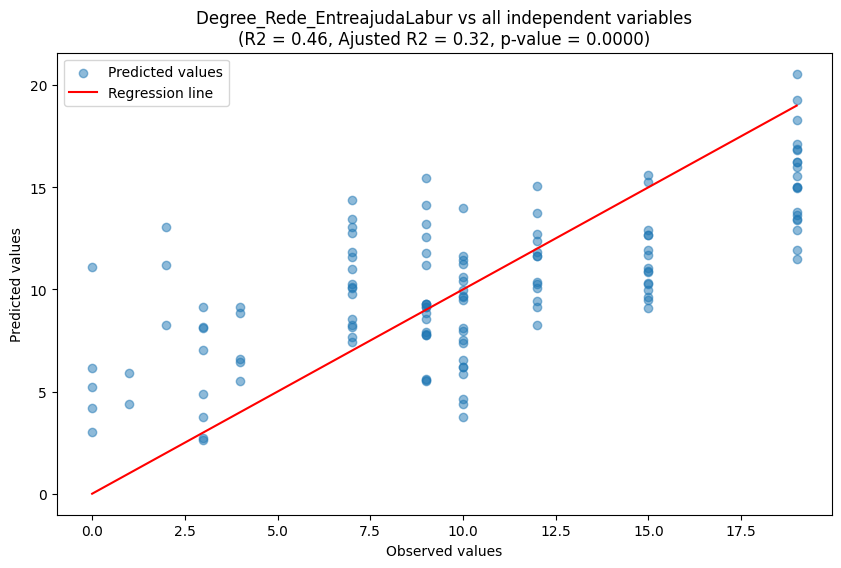

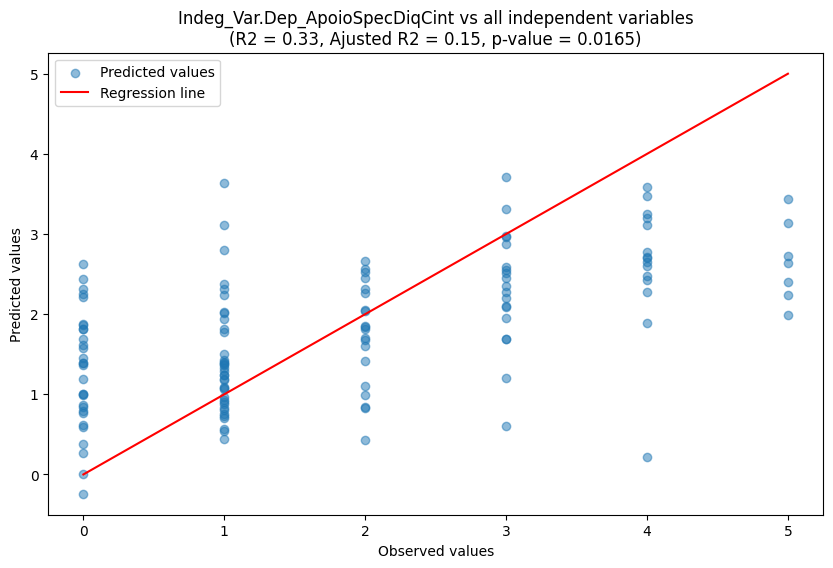

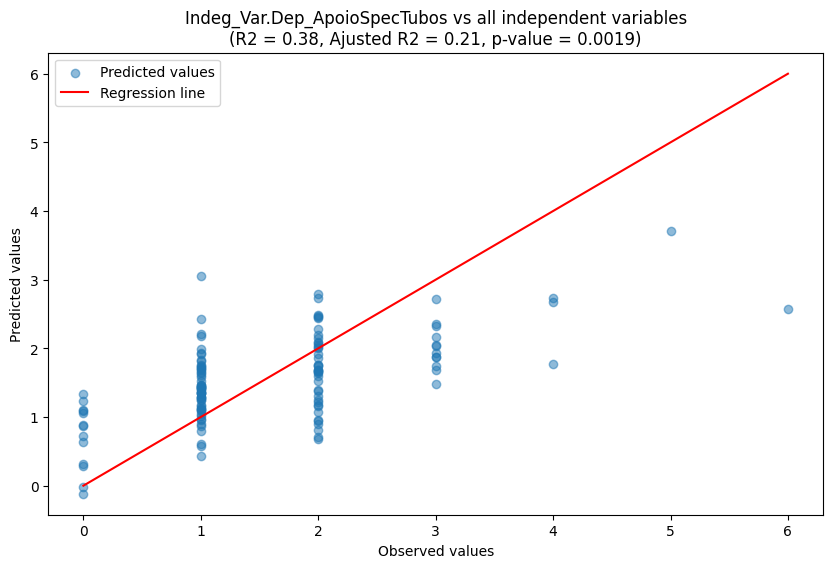

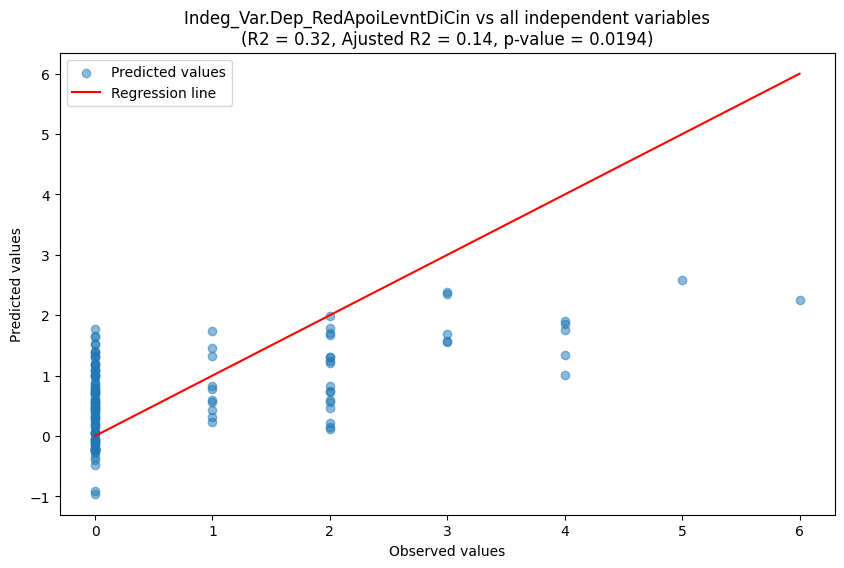

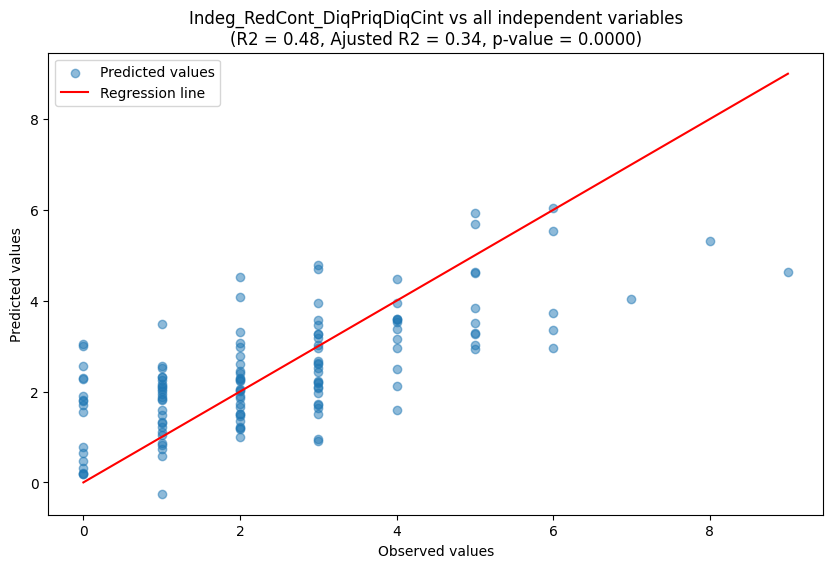

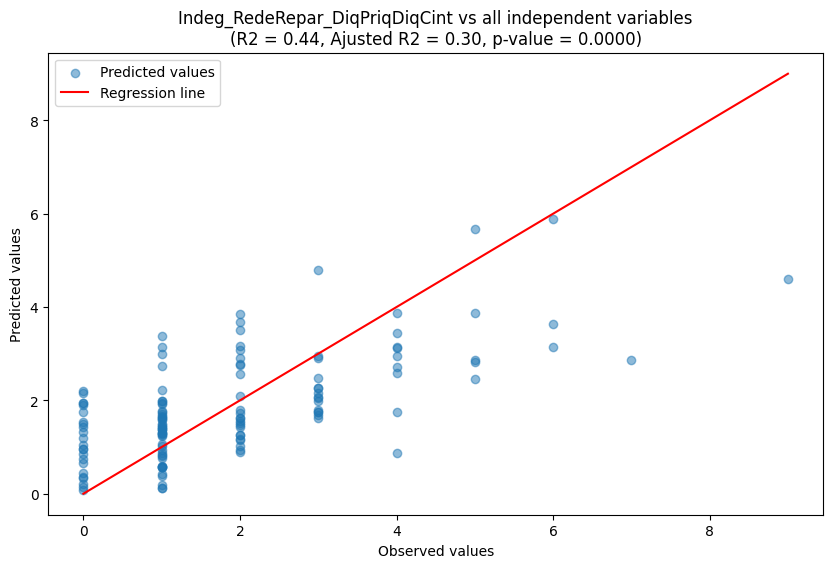

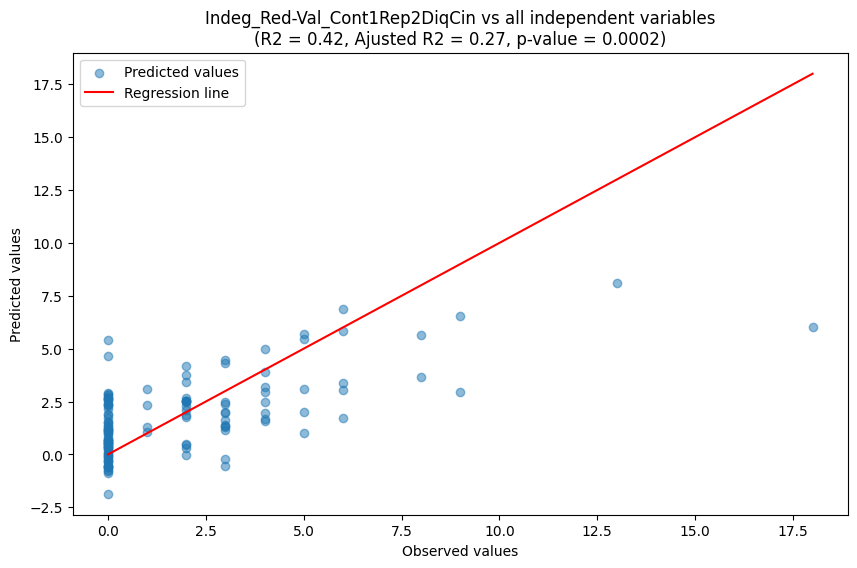

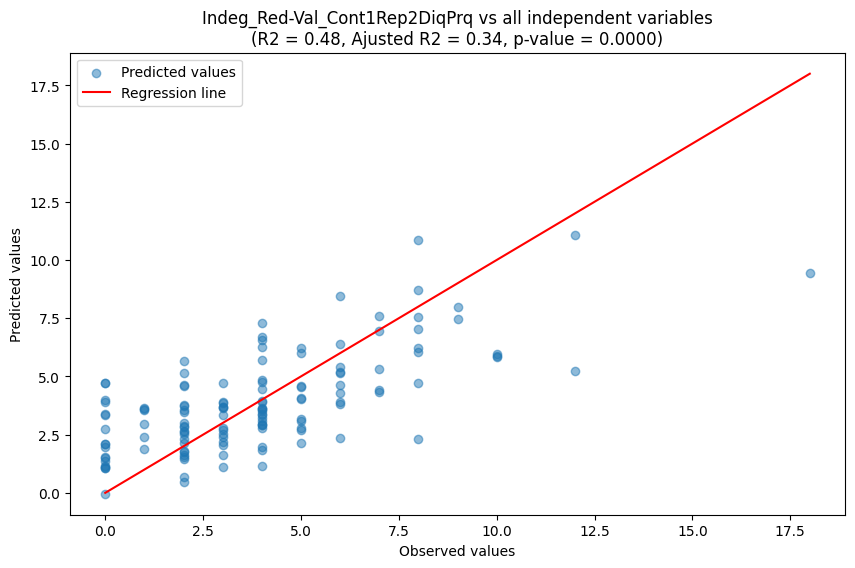

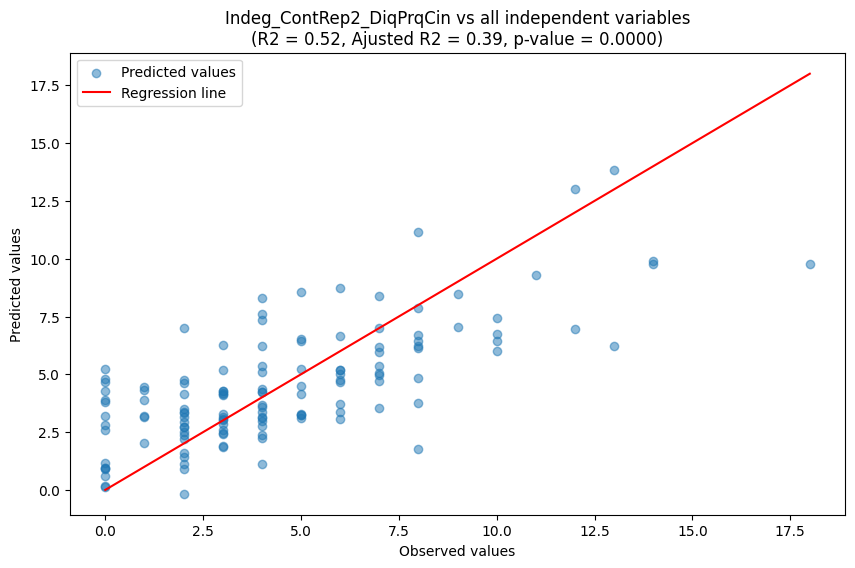

In [20]:

# Asegurarse de que la columna 'id' esté presente si fue eliminada
if 'id' in data_frame_combinado_indep.columns and 'id' not in filtered_indep_vars.columns:
    filtered_indep_vars['id'] = data_frame_combinado_indep['id']

if 'id' in data_frame_combinado_dep.columns and 'id' not in filtered_dep_vars.columns:
    filtered_dep_vars['id'] = data_frame_combinado_dep['id']

# Seleccionar todas las variables independientes
independent_vars = filtered_indep_vars.drop(columns=['id'])

# Añadir una constante (intercepto) al modelo
X = sm.add_constant(independent_vars)

# Diccionarios para almacenar los resultados
r2_scores = {} #coef regression
adjusted_r2_scores = {} #coef reg ajustado
p_values = {}

# Iterar sobre cada variable dependiente filtrada
for dependent_var in filtered_dep_vars.columns:
    if dependent_var != 'id':
        y = filtered_dep_vars[dependent_var]
        
        # Realizar la regresión OLS
        model = sm.OLS(y, X).fit()
        
        # Verificar si el R2 ajustado es válido
        if model.rsquared_adj != float('-inf') and not pd.isna(model.rsquared_adj):
            # Almacenar el R2, R2 ajustado y los p-values
            r2_scores[dependent_var] = model.rsquared
            adjusted_r2_scores[dependent_var] = model.rsquared_adj
            p_values[dependent_var] = model.pvalues

# Convertir los diccionarios a dataframes
r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Variable Dependiente', 'R2'])
adjusted_r2_df = pd.DataFrame(list(adjusted_r2_scores.items()), columns=['Variable Dependiente', 'R2 Ajustado'])
p_values_df = pd.DataFrame(p_values).transpose()
p_values_df.reset_index(inplace=True)
p_values_df.columns = ['Variable Dependiente'] + list(p_values_df.columns[1:])

regression_value = 0.10

# Filtrar las variables con R2 ajustado superior a 'regression_value'
filtered_r2_df = adjusted_r2_df[adjusted_r2_df['R2 Ajustado'] > regression_value]

# Crear un directorio para guardar los gráficos
os.makedirs('../DataIntermediate/regression_plots', exist_ok=True)

# Generar scatter plots para las regresiones con R2 Ajustado > 'regression_value'
for dependent_var in filtered_r2_df['Variable Dependiente']:
    y = filtered_dep_vars[dependent_var]
    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5, label='Predicted values')
    
    # Añadir línea de regresión
    min_y = min(y)
    max_y = max(y)
    plt.plot([min_y, max_y], [min_y, max_y], color='red', label='Regression line')  # Línea de regresión
    
    plt.title(f'{dependent_var} vs all independent variables\n(R2 = {model.rsquared:.2f}, Ajusted R2 = {model.rsquared_adj:.2f}, p-value = {model.f_pvalue:.4f})')
    plt.xlabel('Observed values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.grid(False)
    # plt.savefig(f'../DataIntermediate/regression_plots/regresion_{dependent_var}.png')  # Guardar los plots
    plt.show()

# Crear un nuevo libro de trabajo de Excel
wb = Workbook()

# Hoja para R2
ws_r2 = wb.active
ws_r2.title = "R2"
for idx, row in r2_df.iterrows():
    ws_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_r2.cell(row=idx + 1, column=2, value=row['R2'])

# Hoja para R2 Ajustado
ws_adjusted_r2 = wb.create_sheet(title="R2 Ajustado")
for idx, row in adjusted_r2_df.iterrows():
    ws_adjusted_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_adjusted_r2.cell(row=idx + 1, column=2, value=row['R2 Ajustado'])

# Hoja para p-values
ws_pvalues = wb.create_sheet(title="P-Values")
for idx, row in p_values_df.iterrows():
    for col_idx, value in enumerate(row):
        ws_pvalues.cell(row=idx + 1, column=col_idx + 1, value=value)

# Hoja para las regresiones con R2 Ajustado > 0.30
ws_filtered_r2 = wb.create_sheet(title=f"Regresiones con R2 > {regression_value}")
for idx, row in filtered_r2_df.iterrows():
    ws_filtered_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_filtered_r2.cell(row=idx + 1, column=2, value=row['R2 Ajustado'])

# Guardar el archivo Excel
wb.save('../Results/resultados_regresiones_ols.xlsx')


In [21]:
r2_df.head(10) #entre parenthèses: num de var à afficher

,Variable Dependiente,R2
0,Degree_Rede_EntreajudaLabur,0.463327
1,Indeg_Var.Dep_RedeControlExtAusencia,0.276429
2,Indeg_Var.Dep_ApoioSpecDiqCint,0.328491
3,Indeg_Var.Dep_ApoioSpecTubos,0.376144
4,Indeg_Var.Dep_RedApoiLevntDiCin,0.324526
5,Indeg_RedCont_DiqPriqDiqCint,0.480645
6,Indeg_RedeRepar_DiqPriqDiqCint,0.444431
7,Indeg_Red-Val_Cont1Rep2DiqCin,0.420438
8,Indeg_Red-Val_Cont1Rep2DiqPrq,0.478207
9,Indeg_ContRep2_DiqPrqCin,0.517327


## Run a RF model for each variable and obtain the importances and interactions between the variables. 

In [568]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from openpyxl import Workbook
import os

In [569]:
indep_variables_no_ceros = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',')
dep_variables_no_ceros= pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',')

dep_variables_no_ceros.head()

,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7,1,4,2,1,1,0,1,1,1,0
1,Alamada Bia,2,2,4,2,0,2,2,0,4,4,0
2,Alanghate Mfumba,10,1,0,0,0,2,1,0,3,3,0
3,Albat Calabus,10,0,2,0,0,2,2,0,4,4,0
4,Americano Mbunde,19,1,1,2,0,2,2,0,4,4,0


In [570]:

from sklearn.preprocessing import LabelEncoder
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Aplicar LabelEncoder a cada columna en la lista
for col in columns_to_encode:
    indep_variables_no_ceros[col] = label_encoder.fit_transform(indep_variables_no_ceros[col])



### Acá es dónde vas a filtrar las variables independientes

Si vas a eliminar variables para modelar es aquí donde debes hacerlo

In [571]:
variables = ['id',
    'Degree_IntimAmigUnd',
    'Indeg_RedeRisk_Cen',
    'Indeg_RedeConfianc',
    'Indeg_VendaParcela',
    'PC1_Distance_Pro',
    'Avg_Distancia_Dist_moranza',
    'Degree_RedeTotFamil',
    '1_VarExp_Moranca',
    '5_VarExp_Atri_Idade',
    '7_VarExp_Atri_IndForcaFugon',
    '8_VarExp_Atri_IndInvestDiq',
    '9_VarExp_Atri_IndMelhorTecnDiqCint']

#PRESELECT INDEG
# variables = [
#     'id',
#     'Degree_IntimAmigUnd',
#     'Indeg_RedeRisk_Cen',
#     'Indeg_RedeConfianc',
#     'Indeg_VendaParcela',
#     'Indeg_EmprestParce',
#     'PC1_Distance_Pro',
#     'Avg_Distancia_Dist_moranza',
#     'Degree_RedeTotFamil',
#     '1_VarExp_Moranca',
#     '2_VarExp_Atri_Tabanca',
#     '3_VarExp_Atri_Fanado',
#     '4_VarExp_Atri_CargosWM',
#     '5_VarExp_Atri_Idade',
#     '7_VarExp_Atri_IndForcaFugon',
#     '8_VarExp_Atri_IndInvestDiq',
#     '9_VarExp_Atri_IndMelhorTecnDiqCint',
#     '10_VarExp_Atri_MelhorTecnTubos']

#PRESELECT OUTDEG
#variables = ['id',    
    # 'Degree_IntimAmigUnd',
    # 'OutDeg_RedeRisk_Cen',
    # 'OutDeg_RedeConfianc',
    # 'OutDeg_VendaParcela',
    # 'OutDeg_EmprestParce',
    # 'PC1_Distance_Pro',
    # 'Avg_Distancia_Dist_moranza',
    # 'Degree_RedeTotFamil',
    # '1_VarExp_Moranca',
    # '2_VarExp_Atri_Tabanca',
    # '3_VarExp_Atri_Fanado',
    # '4_VarExp_Atri_CargosWM',
    # '5_VarExp_Atri_Idade',
    # '7_VarExp_Atri_IndForcaFugon',
    # '8_VarExp_Atri_IndInvestDiq',
    # '9_VarExp_Atri_IndMelhorTecnDiqCint',
    # '10_VarExp_Atri_MelhorTecnTubos']

#RAW
#variables = ['id',    'OutDeg_RedConfltAgu',
    # 'Degree_RedConfliAgu',
    # 'Degree_RedeIrmonsPr',
    # 'OutDeg_PaiTiopaterC',
    # 'OutDeg_TiosMaternos',
    # 'Degree_IntimAmigUnd',
    # 'OutDeg_IntimAmigos_',
    # 'OutDeg_RedeRisk_Cen',
    # 'OutDeg_RedeConfianc',
    # 'Degree_RedeConflitA',
    # 'Degree_RedeConflitG',
    # 'OutDeg_VendaParcela',
    # 'OutDeg_EmprestParce',
    # 'PC1_Distance_Pro',
    # 'PC2_Distance_Pro',
    # 'Avg_Distancia_Dist_moranza',
    # 'Degree_RedeTotFamil',
    # '1_VarExp_Moranca',
    # '2_VarExp_Atri_Tabanca',
    # '3_VarExp_Atri_Fanado',
    # '4_VarExp_Atri_CargosWM',
    # '5_VarExp_Atri_Idade',
    # '6_VarExp_Atri_ClassIdade',
    # '7_VarExp_Atri_IndForcaFugon',
    # '8_VarExp_Atri_IndInvestDiq',
    # '9_VarExp_Atri_IndMelhorTecnDiqCint',
    # '10_VarExp_Atri_MelhorTecnTubos']

#RAW
# variables = [
#     'id',
#     'Indeg_RedConfltAgu',
#     'Degree_RedConfliAgu',
#     'Degree_RedeIrmonsPr',
#     'Indeg_PaiTiopaterC',
#     'Indeg_TiosMaternos',
#     'Degree_IntimAmigUnd',
#     'Indeg_IntimAmigos_',
#     'Indeg_RedeRisk_Cen',
#     'Indeg_RedeConfianc',
#     'Degree_RedeConflitA',
#     'Degree_RedeConflitG',
#     'Indeg_VendaParcela',
#     'Indeg_EmprestParce',
#     'PC1_Distance_Pro',
#     'PC2_Distance_Pro',
#     'Avg_Distancia_Dist_moranza',
#     'Degree_RedeTotFamil',
#     '1_VarExp_Moranca',
#     '2_VarExp_Atri_Tabanca',
#     '3_VarExp_Atri_Fanado',
#     '4_VarExp_Atri_CargosWM',
#     '5_VarExp_Atri_Idade',
#     '6_VarExp_Atri_ClassIdade',
#     '7_VarExp_Atri_IndForcaFugon',
#     '8_VarExp_Atri_IndInvestDiq',
#     '9_VarExp_Atri_IndMelhorTecnDiqCint',
#     '10_VarExp_Atri_MelhorTecnTubos']

In [572]:
indep_variables_no_ceros = indep_variables_no_ceros[variables]

indep_variables_no_ceros.head()

,id,Degree_IntimAmigUnd,Indeg_RedeRisk_Cen,Indeg_RedeConfianc,Indeg_VendaParcela,PC1_Distance_Pro,Avg_Distancia_Dist_moranza,Degree_RedeTotFamil,1_VarExp_Moranca,5_VarExp_Atri_Idade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint
0,Aiace Quior,8,3,1,2,5929.470888,1112.275742,6,56,53,1.0,3,3
1,Alamada Bia,4,0,1,0,4359.965205,1366.497947,0,1,37,1.0,1,0
2,Alanghate Mfumba,3,0,0,0,5700.390367,1153.302283,2,29,25,1.0,4,3
3,Albat Calabus,6,0,0,0,-1160.716385,1729.745054,2,48,48,2.0,4,3
4,Americano Mbunde,1,0,0,1,-1254.279547,2647.716570,5,22,30,1.0,2,1


Variables dependientes: 

1. Considerando que lo mejor es analizar una a una para ver importancias e interacciones en el modelo de RF, debe copiar una de la variables de la lista y ponerla (dentro de las comillas simples) en la siguiente celda en la variable: *'variable_a_predecir = dep_variables_no_ceros['']'*

2. Lista: 
- Degree_Rede_EntreajudaLabur 

- Indeg_Var.Dep_RedeControlExtAusencia	
- Indeg_Var.Dep_ApoioSpecDiqCint	
- Indeg_Var.Dep_ApoioSpecTubos	
- Indeg_Var.Dep_RedApoiLevntDiCin	
- Indeg_RedCont_DiqPriqDiqCint	
- Indeg_RedeRepar_DiqPriqDiqCint	
- Indeg_Red-Val_Cont1Rep2DiqCin	
- Indeg_Red-Val_Cont1Rep2DiqPrq	
- Indeg_ContRep2_DiqPrqCin 
- Indeg_Var.Dep_RedePartilhaAgu

- OutDeg_Var.Dep_RedeControlExtAusencia	
- OutDeg_Var.Dep_ApoioSpecDiqCint	
- OutDeg_Var.Dep_ApoioSpecTubos	
- OutDeg_Var.Dep_RedApoiLevntDiCin	
- OutDeg_RedCont_DiqPriqDiqCint	
- OutDeg_RedeRepar_DiqPriqDiqCint	
- OutDeg_Red-Val_Cont1Rep2DiqCin	
- OutDeg_Red-Val_Cont1Rep2DiqPrq	
- OutDeg_ContRep2_DiqPrqCin 
- OutDeg_Var.Dep_RedePartilhaAgu

In [573]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


variable_a_predecir = dep_variables_no_ceros['Indeg_Red-Val_Cont1Rep2DiqPrq']

# Definir la variable dependiente y las variables independientes
X = indep_variables_no_ceros.drop(columns=['id'])
y = variable_a_predecir

y.head()

0    1
1    4
2    3
3    4
4    4
Name: Indeg_Red-Val_Cont1Rep2DiqPrq, dtype: int64

In [574]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables independientes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=110, random_state=42) #jouer avec le n_estimators pour affiner RF. ie. 120. Pas mettre trop d´obs.
rf.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)


Mean Squared Error: 7.7823
R^2 Score: -0.0915


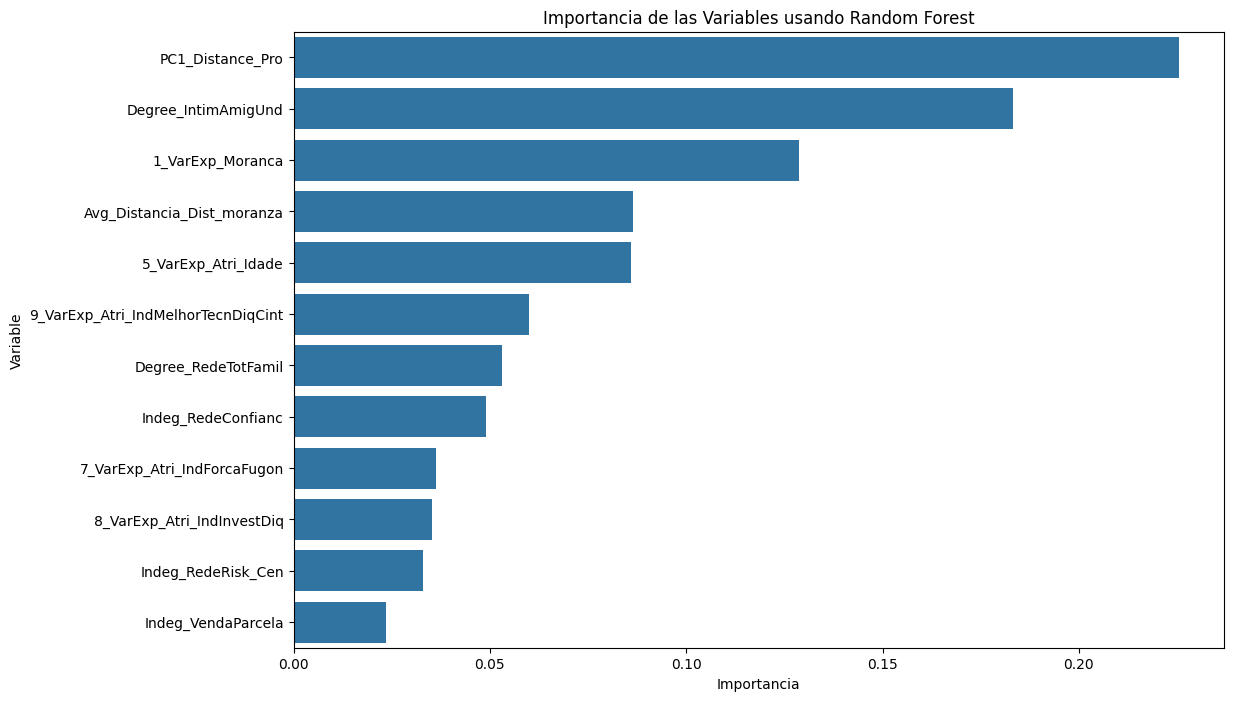

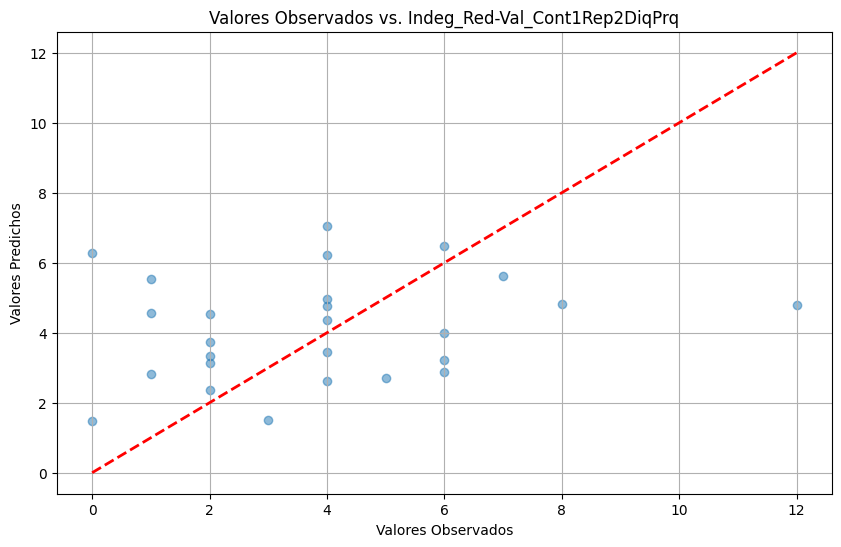

In [575]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
n = len(y_test)
p = X_test_scaled.shape[1]

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Calcular la importancia de las variables
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Crear un gráfico de las importancias de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=importance_df)
plt.title('Importancia de las Variables usando Random Forest')
plt.show()

# Crear un gráfico de Valores Observados vs. Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title(f'Valores Observados vs. {variable_a_predecir.name}')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()


In [576]:
# Definir la ruta de salida
output_path_importances = "../Results/importances.csv"
os.makedirs("../Results/", exist_ok=True)

# Guardar las 10 interacciones más altas en un archivo CSV

importance_df.to_csv(output_path_importances, index=True)

In [558]:
from sklearn.inspection import partial_dependence

variables = X.columns

# Calcular la importancia y la dirección de las interacciones
interaction_importances = []

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        pdp = partial_dependence(rf, X_train_scaled, features=[i, j], kind="average")
        pdp_values = pdp['average'][0]
        
        # Calcular la importancia de la interacción
        interaction_importance = np.mean(np.abs(pdp_values - pdp_values.mean()))
        
        # Calcular la dirección de la interacción
        direction = np.mean(np.diff(pdp_values, axis=0))
        
        interaction_importances.append(((variables[i], variables[j]), interaction_importance, direction))

# Ordenar interacciones por importancia
interaction_importances = sorted(interaction_importances, key=lambda x: x[1], reverse=True)
interaction_importance_df = pd.DataFrame(interaction_importances, columns=['Interacción', 'Importancia', 'Dirección'])



In [559]:
# Mostrar las 10 interacciones más importantes
interaction_importance_df.head(10)

,Interacción,Importancia,Dirección
0,"(Degree_IntimAmigUnd, PC1_Distance_Pro)",1.149060,0.203569
1,"(Degree_IntimAmigUnd, 1_VarExp_Moranca)",0.910466,0.164420
2,"(Degree_IntimAmigUnd, Degree_RedeTotFamil)",0.900436,0.173509
3,"(Degree_IntimAmigUnd, Indeg_RedeConfianc)",0.863471,0.169760
4,"(Degree_IntimAmigUnd, Avg_Distancia_Dist_moranza)",0.857229,0.168858
5,"(Degree_IntimAmigUnd, 8_VarExp_Atri_IndInvestDiq)",0.846097,0.166134
6,"(Degree_IntimAmigUnd, 5_VarExp_Atri_Idade)",0.842901,0.162106
7,"(Degree_IntimAmigUnd, 9_VarExp_Atri_IndMelhorT...",0.832197,0.164486
8,"(Degree_IntimAmigUnd, Indeg_RedeRisk_Cen)",0.805774,0.161242
9,"(Degree_IntimAmigUnd, 7_VarExp_Atri_IndForcaFu...",0.795045,0.156308


Interpretación de los Resultados de importancia par la variable predicha de 'Degree_Rede_EntreajudaLabur':

Primera Interacción (Avg_Distancia_Dist_moranza, 2_VarExp_Atri_Tab...):

Importancia: 3.108262, lo que sugiere que esta interacción es la más importante en el conjunto analizado.
Dirección: 0.051459, indicando un efecto positivo leve; a medida que Avg_Distancia_Dist_moranza y 2_VarExp_Atri_Tab... aumentan, la predicción del modelo tiende a aumentar ligeramente.
Segunda Interacción (Avg_Distancia_Dist_moranza, 7_VarExp_Atri_Ind...):

Importancia: 2.981712, también bastante significativa.
Dirección: 0.051853, similar a la primera, un efecto positivo leve.
Tercera Interacción (Indeg_VendaParcela, Avg_Distancia_Dist_moranza):

Importancia: 2.929915.
Dirección: 0.121224, un efecto positivo más pronunciado en comparación con las dos primeras interacciones.
Cuarta Interacción (Avg_Distancia_Dist_moranza, 10_VarExp_Atri_Me...):

Importancia: 2.901908.
Dirección: 0.049161, efecto positivo leve.
Quinta Interacción (Indeg_RedeRisk_Cen, Avg_Distancia_Dist_moranza):

Importancia: 2.897929.
Dirección: -0.017938, efecto negativo leve, indicando que un aumento en Indeg_RedeRisk_Cen y Avg_Distancia_Dist_moranza tiende a disminuir la predicción del modelo.
Conclusiones:
Variables con mayor interacción: Avg_Distancia_Dist_moranza parece interactuar significativamente con varias otras variables, lo que sugiere que su influencia combinada con otras variables es importante en la predicción del modelo.
Direcciones variadas: La mayoría de las interacciones tienen una dirección positiva, pero algunas, como la interacción entre Indeg_RedeRisk_Cen y Avg_Distancia_Dist_moranza, tienen una dirección negativa, indicando diferentes efectos combinados en la predicción del modelo.
Importancia relativa: Las interacciones con valores de importancia más altos deben ser consideradas cuidadosamente al interpretar el comportamiento del modelo, ya que tienen un mayor impacto en las predicciones.

In [560]:
# Ordenar el DataFrame por la columna de importancia en orden descendente
interaction_importance_df_sorted = interaction_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 interacciones más altas
top_10_interactions = interaction_importance_df_sorted.head(10)

# Definir la ruta de salida
output_path = "../Results/interactions_modeled.csv"
os.makedirs("../Results/", exist_ok=True)

# Guardar las 10 interacciones más altas en un archivo CSV
try:
    top_10_interactions.to_csv(output_path, index=True)
    print(f"Archivo guardado exitosamente en {output_path}.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")

Archivo guardado exitosamente en ../Results/interactions_modeled.csv.


In [561]:
# Combinar predicciones de entrenamiento y prueba para todo el conjunto de datos
y_pred_all = np.concatenate([y_pred_train, y_pred_test])
y_all = np.concatenate([y_train, y_test])

In [562]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_all, y_pred_all)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_all, y_pred_all)
r2 = r2_score(y_all, y_pred_all)
pearson_corr, _ = pearsonr(y_all, y_pred_all)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Pearson Correlation: {pearson_corr:.4f}")


Mean Squared Error (MSE): 2.5455
Root Mean Squared Error (RMSE): 1.5955
Mean Absolute Error (MAE): 1.1253
R^2 Score: 0.7153
Pearson Correlation: 0.8608


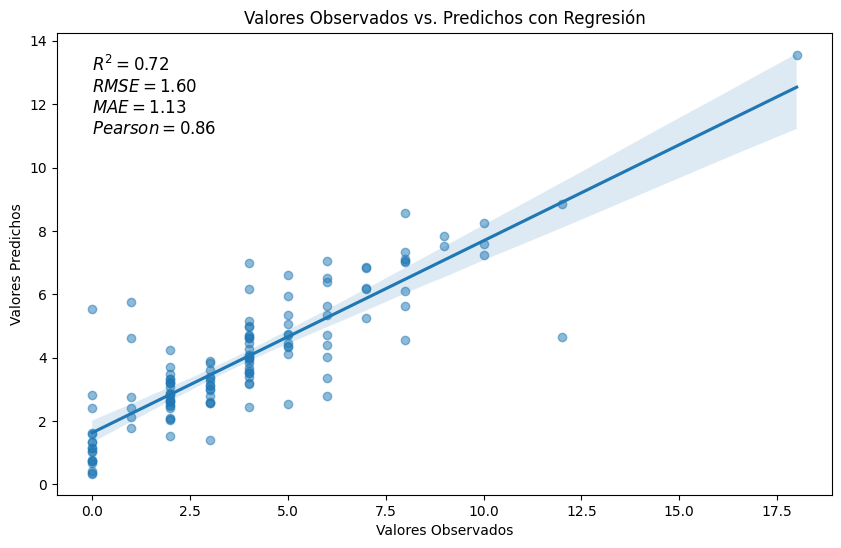

In [563]:
# Crear un gráfico de Valores Observados vs. Predichos con regresión
plt.figure(figsize=(10, 6))
sns.regplot(x=y_all, y=y_pred_all, scatter_kws={'alpha':0.5})
# plt.plot([min(y_all), max(y_all)], [min(y_all), max(y_all)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. Predichos con Regresión')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.text(min(y_all), max(y_pred_all), f'$R^2 = {r2:.2f}$\n$RMSE = {rmse:.2f}$\n$MAE = {mae:.2f}$\n$Pearson = {pearson_corr:.2f}$', fontsize=12, verticalalignment='top')
plt.grid(False)
plt.show()




### Now we will run all in one loop and store the results in one csv file. 

In [564]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from openpyxl import Workbook

In [565]:
dep_variables_no_ceros.head()
# Definir la variable dependiente y las variables independientes
X = indep_variables_no_ceros.drop(columns=['id'])
y = dep_variables_no_ceros.drop(columns=['id'])


In [566]:
# Este proceso sigue usando el filtro que se hace arriba de variables independientes
X

,Degree_IntimAmigUnd,Indeg_RedeRisk_Cen,Indeg_RedeConfianc,PC1_Distance_Pro,Avg_Distancia_Dist_moranza,Degree_RedeTotFamil,1_VarExp_Moranca,5_VarExp_Atri_Idade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint
0,8,3,1,5929.470888,1112.275742,6,56,53,1.0,3,3
1,4,0,1,4359.965205,1366.497947,0,1,37,1.0,1,0
2,3,0,0,5700.390367,1153.302283,2,29,25,1.0,4,3
3,6,0,0,-1160.716385,1729.745054,2,48,48,2.0,4,3
4,1,0,0,-1254.279547,2647.716570,5,22,30,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
124,9,7,5,-3765.559958,1852.384848,0,55,52,2.0,4,16
125,12,9,1,-2366.792765,1663.331914,5,2,51,3.0,2,7
126,3,4,0,-2967.322411,952.333256,1,23,78,2.0,1,1
127,4,2,2,-3026.500604,1355.904549,0,46,52,1.0,4,3


In [567]:
y

,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,7,1,4,2,1,1,0,1,1,1,0
1,2,2,4,2,0,2,2,0,4,4,0
2,10,1,0,0,0,2,1,0,3,3,0
3,10,0,2,0,0,2,2,0,4,4,0
4,19,1,1,2,0,2,2,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...
124,9,4,2,1,0,1,0,1,1,1,2
125,12,1,1,1,1,3,2,3,5,5,2
126,15,0,1,1,1,2,1,2,3,3,3
127,9,1,2,1,2,1,0,1,1,1,1


In [577]:
# Diccionarios para almacenar los resultados
results_test = []
results_all = []
selected_variables = []

# Iterar sobre cada variable dependiente
for col in y.columns:
    # Seleccionar la variable dependiente específica
    y_col = y[col]
    
    # Dividir los datos en entrenamiento (80%) y prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y_col, test_size=0.2, random_state=42)
    
    # Escalar las variables independientes para el entrenamiento y prueba
    scaler_train = StandardScaler()
    X_train_scaled = scaler_train.fit_transform(X_train)
    X_test_scaled = scaler_train.transform(X_test)
    
    # Crear el modelo de Random Forest y entrenarlo con los datos de entrenamiento
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Realizar predicciones con los datos de prueba
    y_pred_test = rf.predict(X_test_scaled)
    
    # Calcular métricas de rendimiento con los datos de prueba
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    # Guardar resultados para los datos de prueba
    results_test.append({
        'Variable Dependiente': col,
        'R2 Test Data': r2_test,
        'RMSE Test Data': rmse_test,
        'MAE Test Data': mae_test
    })
    
    # Realizar predicciones con todos los datos (entrenamiento + prueba)
    X_scaled = scaler_train.transform(X)  # Escalar todas las variables independientes
    y_pred_all = rf.predict(X_scaled)
    
    # Calcular métricas de rendimiento con todos los datos
    r2_all = r2_score(y_col, y_pred_all)
    mse_all = mean_squared_error(y_col, y_pred_all)
    rmse_all = np.sqrt(mse_all)
    mae_all = mean_absolute_error(y_col, y_pred_all)
    
    # Guardar resultados para todos los datos
    results_all.append({
        'Variable Dependiente': col,
        'R2 All Data': r2_all,
        'RMSE All Data': rmse_all,
        'MAE All Data': mae_all
    })
    
    # Si el R2 con todos los datos es mayor a 0.50, guardar el nombre de la variable
    if r2_all > 0.20:
        selected_variables.append(col)
        
        # Crear gráfico de valores observados vs predichos usando sns.regplot
        plt.figure(figsize=(10, 6))
        sns.regplot(x=y_col, y=y_pred_all, scatter_kws={'alpha':0.5}, color='red')
        plt.title(f'{col} - Valores Observados vs. Predichos con Random Forest\n(R2 = {r2_all:.2f})')
        plt.xlabel('Valores Observados')
        plt.ylabel('Valores Predichos')
        plt.grid(False)
        plt.show()

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
# Convertir los resultados a DataFrames
results_test_df = pd.DataFrame(results_test)
results_all_df = pd.DataFrame(results_all)

# Guardar los resultados en archivos Excel
wb = Workbook()

# Hoja para resultados con datos de prueba
ws_test = wb.active
ws_test.title = "Random Forest Results Test Data"
ws_test.append(['Variable Dependiente', 'R2 Test Data', 'RMSE Test Data', 'MAE Test Data'])
for row in results_test:
    ws_test.append([row['Variable Dependiente'], row['R2 Test Data'], row['RMSE Test Data'], row['MAE Test Data']])

# Hoja para resultados con todos los datos
ws_all = wb.create_sheet(title="Random Forest Results All Data")
ws_all.append(['Variable Dependiente', 'R2 All Data', 'RMSE All Data', 'MAE All Data'])
for row in results_all:
    ws_all.append([row['Variable Dependiente'], row['R2 All Data'], row['RMSE All Data'], row['MAE All Data']])

# Guardar el archivo Excel
wb.save('../Results/random_forest_results.xlsx')
